In [1]:
import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.sparse import csr_matrix
from joblib import Parallel, delayed
import os
import torch

import scSLAT
from scSLAT.model import Cal_Spatial_Net, load_anndatas, run_SLAT_mlp_AGF, spatial_match, run_SLAT, compute_lisi_for_adata, run_SLAT_AGF_contrast
from scSLAT.viz import match_3D_multi, hist, Sankey, build_3D
from scSLAT.metrics import region_statistics


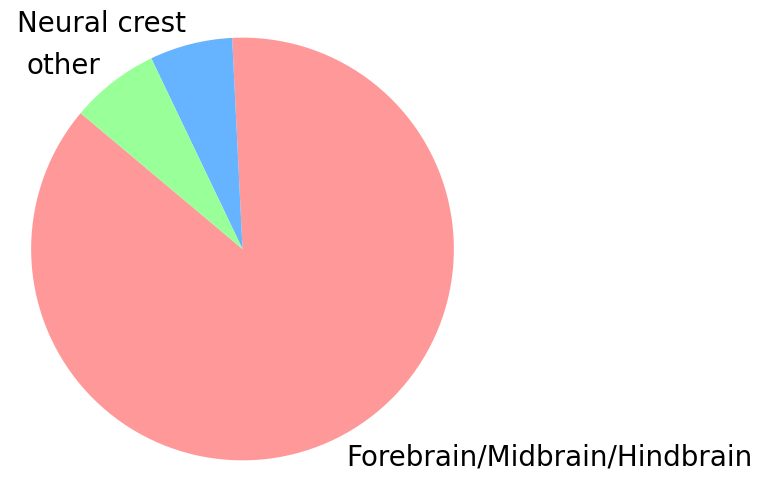

In [11]:
import matplotlib.pyplot as plt

sizes = [1319, 96, 103]
labels = ['Forebrain/Midbrain/Hindbrain', 'Neural crest', 'other']
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(6, 6))
plt.pie(sizes, colors=colors, labels= labels,
        startangle=140, textprops={'fontsize': 20})

plt.axis('equal')
plt.show()

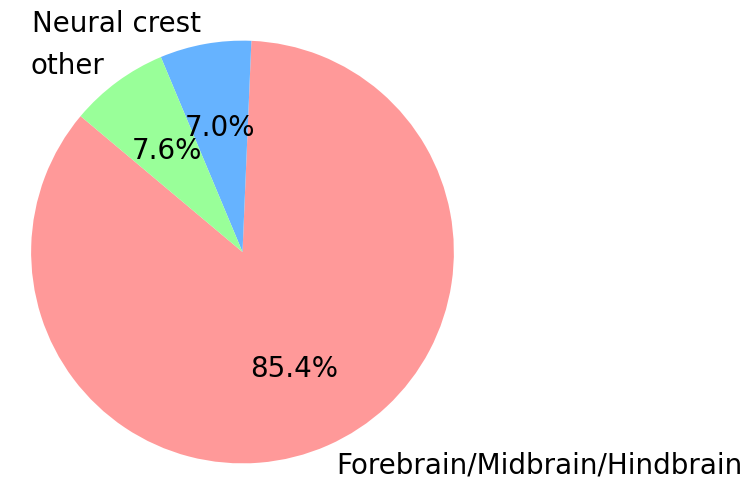

In [13]:
import matplotlib.pyplot as plt
# SLAT
sizes = [1297, 106, 115]
labels = ['Forebrain/Midbrain/Hindbrain', 'Neural crest', 'other']
colors = colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
plt.figure(figsize=(6, 6))
plt.pie(sizes, colors=colors, labels= labels, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 20})

plt.axis('equal')
plt.show()

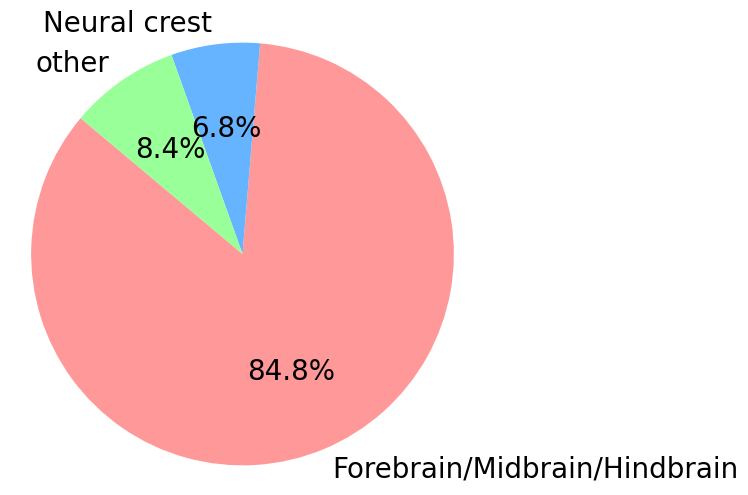

In [14]:
# BANKSY
sizes = [1287, 103, 128]
labels = ['Forebrain/Midbrain/Hindbrain', 'Neural crest', 'other']
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(6, 6))
plt.pie(sizes, colors=colors, labels= labels, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 20})

plt.axis('equal')
plt.show()

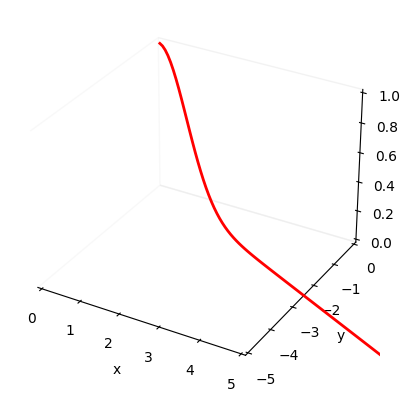

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成数据
x = np.linspace(0, 10, 100)
y = -0.5 * x  # 斜着下降
z = np.exp(-((x) ** 2) / 2)  # 正态分布

# 绘图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='red', linewidth=2)

# 隐藏背景网格和边框
ax.grid(False)
ax.set_frame_on(False)

# 只显示坐标轴
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# 移除不必要的坐标轴面
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# 设置 x 和 y 轴从 0 开始
ax.set_xlim([0, 5])
ax.set_ylim([-5, 0])  # 这里 -10 表示向下延伸到 -10

plt.show()


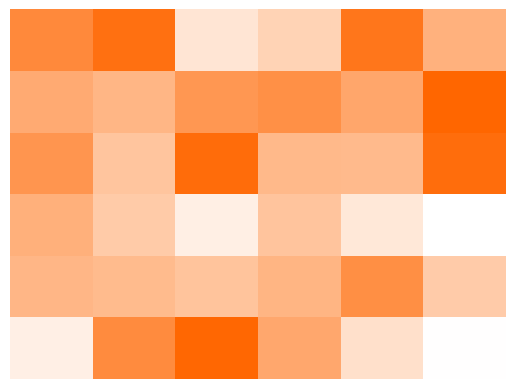

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 生成随机数据
data = np.random.rand(6, 6)

# 定义一个稍微深一点的橙色
deep_orange = "#FF6600"  # 这是一个深一点的橙色HEX颜色代码

# 创建一个包含深橙色的调色板
custom_colors = ["#FFFFFF", deep_orange]  # 从白色渐变到深橙色
custom_cmap = LinearSegmentedColormap.from_list("custom_orange", custom_colors)

# 绘制热力图
ax = sns.heatmap(data, cmap=custom_cmap, annot=False, cbar=False)  # 使用 custom_cmap 颜色方案，并显示数值
ax.axis('off')  # 关闭坐标轴
plt.show()

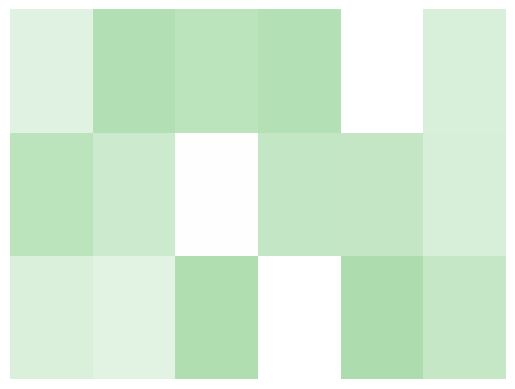

In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 生成随机数据
data = np.random.rand(3, 6)

# 定义一个稍微深一点的橙色
deep_orange = "#ADDDAE" #93BE18 # 这是一个深一点的橙色HEX颜色代码

# 创建一个包含深橙色的调色板
custom_colors = ["#FFFFFF", deep_orange]  # 从白色渐变到深橙色
custom_cmap = LinearSegmentedColormap.from_list("custom_orange", custom_colors)

# 绘制热力图
ax = sns.heatmap(data, cmap=custom_cmap, annot=False, cbar=False)  # 使用 custom_cmap 颜色方案，并显示数值
ax.axis('off')  # 关闭坐标轴
plt.show()

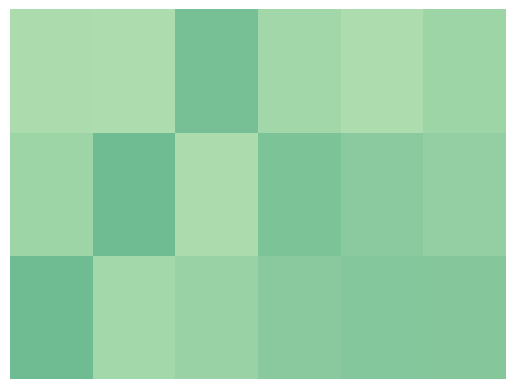

In [86]:

data = np.random.rand(3, 6)

# 定义一个稍微深一点的橙色
deep_orange = "#70BC92" #769913 # 这是一个深一点的橙色HEX颜色代码

# 创建一个包含深橙色的调色板
custom_colors = ["#ADDDAE", deep_orange]  # 从白色渐变到深橙色
custom_cmap = LinearSegmentedColormap.from_list("custom_orange", custom_colors)

# 绘制热力图
ax = sns.heatmap(data, cmap=custom_cmap, annot=False, cbar=False)  # 使用 custom_cmap 颜色方案，并显示数值
ax.axis('off')  # 关闭坐标轴
plt.show()

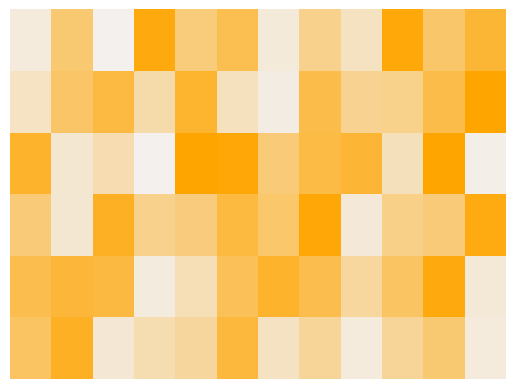

In [65]:
data = np.random.rand(6, 12)
custom_cmap = sns.color_palette("light:orange", as_cmap=True)

# 绘制热力图
ax = sns.heatmap(data, cmap=custom_cmap, annot=False, cbar=False)  # 使用 custom_cmap 颜色方案，并显示数值
ax.axis('off')  # 关闭坐标轴
# plt.title("Heatmap using Seaborn without Axes")
plt.show()

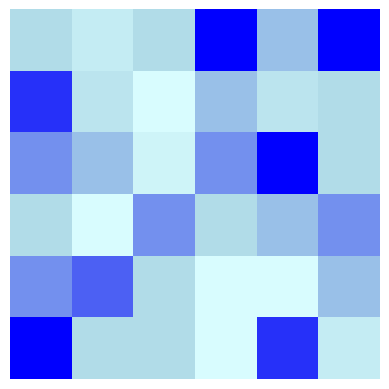

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 生成随机数据
data = np.random.rand(6, 6)

# 指定中心颜色
center_color = "#D8FCFE"

# 创建自定义颜色映射
colors = [center_color, "lightblue", "blue"]
cmap_name = "my_cmap"
n_bins = 10  # 颜色映射中的区间数
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 绘制热力图，使用自定义颜色映射
fig, ax = plt.subplots()
cax = ax.imshow(data, interpolation='nearest', cmap=cmap)
ax.axis('off')  # 关闭坐标轴
plt.show()

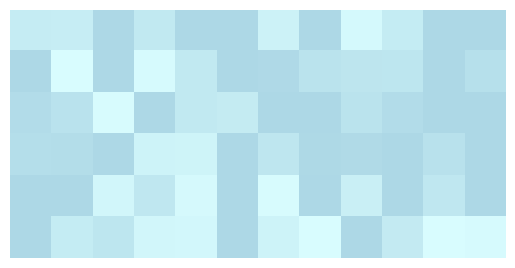

In [70]:
data = np.random.rand(6, 12)

# 指定中心颜色
center_color = "#D8FCFE"

# 创建自定义颜色映射
colors = [center_color, "lightblue", "lightblue"]
cmap_name = "my_cmap"
n_bins = 100  # 颜色映射中的区间数
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 绘制热力图，使用自定义颜色映射
fig, ax = plt.subplots()
cax = ax.imshow(data, interpolation='nearest', cmap=cmap)
ax.axis('off')  # 关闭坐标轴
plt.show()

In [37]:
adata_2=sc.read_h5ad(r"D:\ppppaper\SLAT\SLAT-main\SLAT-main\my_benchmark\DFPLC_75_banksy_data.h5ad")
adata_2.var_names_make_unique(join="++")
adata_2

AnnData object with n_obs × n_vars = 3592 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'annotation', 'UMAP_1', 'UMAP_2', 'banksy'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'X_pca', 'spatial'

In [96]:
adata_2.obs['UMAP_1']

AAACAACGAATAGTTC-1     2.372780
AAACAAGTATCTCCCA-1    -9.534208
AAACACCAATAACTGC-1    19.028011
AAACAGAGCGACTCCT-1    -9.162950
AAACAGGGTCTATATT-1     3.745464
                        ...    
TTGTTGTGTGTCAAGA-1    -6.436607
TTGTTTCACATCCAGG-1    15.888447
TTGTTTCATTAGTCTA-1    17.712899
TTGTTTCCATACAACT-1     2.851471
TTGTTTGTATTACACG-1    14.562031
Name: UMAP_1, Length: 3592, dtype: float64

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

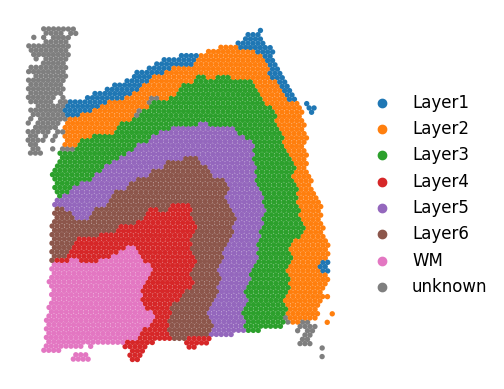

In [42]:
spot_size = 150
pathology_color = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B", "#E377C2", "#7F7F7F"]
sc.pl.spatial(adata_2, img_key=None, color=['banksy'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

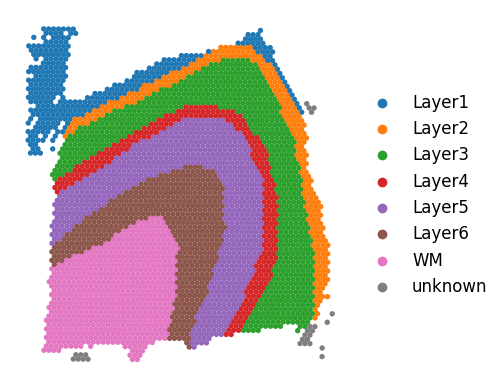

In [43]:
sc.pl.spatial(adata_2, img_key=None, color=['annotation'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [83]:
correct = np.sum(adata_2.obs['annotation'] == adata_2.obs['banksy'])
total = len(adata_2.obs)
accuracy = correct / total

print(f"Overall Accuracy: {accuracy * 100:.8f}%")

Overall Accuracy: 61.66481069%


In [84]:
from sklearn.metrics import classification_report, confusion_matrix

# 获取真实标签和预测标签
true_labels = adata_2.obs['annotation']
pred_labels = adata_2.obs['banksy']

# 生成分类报告
print("Classification Report:")
print(classification_report(true_labels, pred_labels))

# 生成混淆矩阵
print("Confusion Matrix:")
print(confusion_matrix(true_labels, pred_labels))


Classification Report:
              precision    recall  f1-score   support

      Layer1       0.82      0.38      0.52       328
      Layer2       0.45      0.92      0.60       275
      Layer3       0.60      0.60      0.60       771
      Layer4       0.00      0.00      0.00       275
      Layer5       0.96      0.75      0.84       732
      Layer6       0.76      0.76      0.76       533
          WM       0.98      0.63      0.77       652
     unknown       0.06      0.50      0.11        26

    accuracy                           0.62      3592
   macro avg       0.58      0.57      0.52      3592
weighted avg       0.73      0.62      0.65      3592

Confusion Matrix:
[[124  15   0   0   0   0   0 189]
 [ 23 252   0   0   0   0   0   0]
 [  0 291 464   0   1   0   0  15]
 [  0   0 254   0  21   0   0   0]
 [  0   0  49   9 548 126   0   0]
 [  0   0   0 124   3 405   1   0]
 [  0   0   0 241   0   2 409   0]
 [  4   2   0   0   0   0   7  13]]


In [85]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# 计算 ARI
ari_score = adjusted_rand_score(true_labels, pred_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.8f}")

# 计算 NMI
nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
print(f"Normalized Mutual Information (NMI): {nmi_score:.8f}")


Adjusted Rand Index (ARI): 0.52921908
Normalized Mutual Information (NMI): 0.68572367


In [23]:
adata_2=sc.read_h5ad(r"D:\ppppaper\SLAT\SLAT-main\SLAT-main\my_benchmark\STARmap_banksy_data.h5ad")
adata_2.var_names_make_unique(join="++")
adata_2

AnnData object with n_obs × n_vars = 1049 × 166
    obs: 'ct', 'region', 'Region', 'ground_truth', 'banksy'
    uns: 'ct_colors', 'region_colors'
    obsm: 'spatial'

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

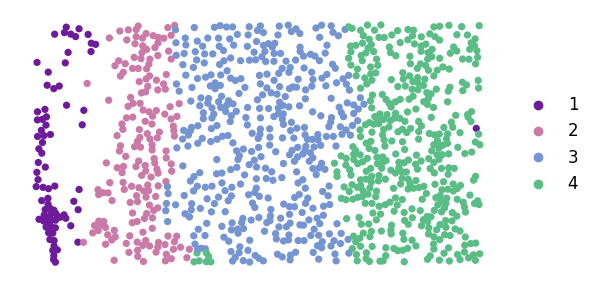

In [24]:
spot_size = 200
pathology_color = ["#6D1A9B", "#CB79A6", "#7494D2", "#59BD85", "#56B3E8", "#FDB815", "#F46867"]
sc.pl.spatial(adata_2, img_key=None, color=['banksy'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [28]:
adata_2.obs['ground_truth'] = adata_2.obs['ground_truth'].astype(str)
correct = np.sum(adata_2.obs['ground_truth'] == adata_2.obs['banksy'])
total = len(adata_2.obs)
accuracy = correct / total
accuracy

0.9151572926596759

In [30]:
true_labels = adata_2.obs['ground_truth']
pred_labels = adata_2.obs['banksy']

In [31]:
# 计算 ARI
ari_score = adjusted_rand_score(true_labels, pred_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.8f}")

# 计算 NMI
nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
print(f"Normalized Mutual Information (NMI): {nmi_score:.8f}")

Adjusted Rand Index (ARI): 0.76176642
Normalized Mutual Information (NMI): 0.76389971


In [32]:
adata_2=sc.read_h5ad(r"D:\ppppaper\SLAT\SLAT-main\SLAT-main\my_benchmark\MERFISH_banksy_data.h5ad")
adata_2.var_names_make_unique(join="++")
adata_2

AnnData object with n_obs × n_vars = 5803 × 155
    obs: 'cell_class', 'neuron_class', 'domain', 'Region', 'ground_truth', 'banksy'
    uns: 'domain_colors'
    obsm: 'spatial'

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

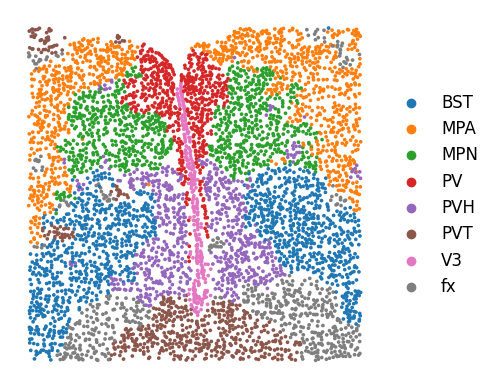

In [33]:
spot_size = 20
pathology_color = [
    "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B",
    "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF", "#AEC7E8", "#FFBB78",
    "#98DF8A", "#FF9896", "#C5B0D5", "#C49C94", "#F7B6D2", "#C7C7C7",
    "#DBDB8D", "#9EDAE5", "#1F9B99", "#FFCD56", "#33A02C", "#FB9A99",
    "#A6CEE3"
]
sc.pl.spatial(adata_2, img_key=None, color=['banksy'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [34]:
correct = np.sum(adata_2.obs['ground_truth'] == adata_2.obs['banksy'])
total = len(adata_2.obs)
accuracy = correct / total

print(f"Overall Accuracy: {accuracy * 100:.8f}%")

Overall Accuracy: 81.81974841%


In [35]:
true_labels = adata_2.obs['ground_truth']
pred_labels = adata_2.obs['banksy']

In [36]:
# 计算 ARI
ari_score = adjusted_rand_score(true_labels, pred_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.8f}")

# 计算 NMI
nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
print(f"Normalized Mutual Information (NMI): {nmi_score:.8f}")

Adjusted Rand Index (ARI): 0.63533604
Normalized Mutual Information (NMI): 0.66294075


In [44]:
adata_1=sc.read_h5ad(r"D:\ppppaper\SLAT\SLAT-main\SLAT-main\my_benchmark\DFPLC_74_banksy_data.h5ad")
adata_1.var_names_make_unique(join="++")
adata_1

AnnData object with n_obs × n_vars = 3673 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'annotation', 'banksy', 'UMAP_1', 'UMAP_2'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'X_pca', 'spatial'

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

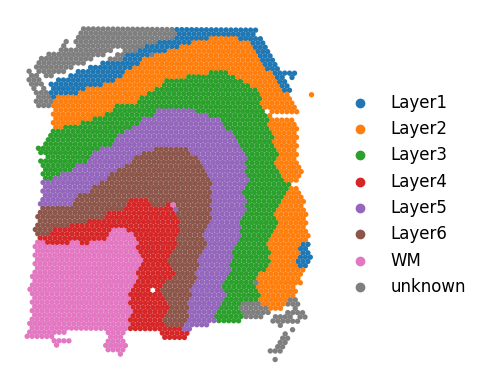

In [45]:
sc.pl.spatial(adata_1, img_key=None, color=['banksy'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [92]:
adata_1.obs['UMAP_1']

AAACAAGTATCTCCCA-1    -9.949911
AAACAATCTACTAGCA-1    -1.001147
AAACACCAATAACTGC-1    20.219358
AAACAGAGCGACTCCT-1    -6.694260
AAACAGCTTTCAGAAG-1     7.811384
                        ...    
TTGTTTCACATCCAGG-1    16.861509
TTGTTTCATTAGTCTA-1    18.712196
TTGTTTCCATACAACT-1     6.305366
TTGTTTGTATTACACG-1    13.927546
TTGTTTGTGTAAATTC-1    -4.624576
Name: UMAP_1, Length: 3673, dtype: float64

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

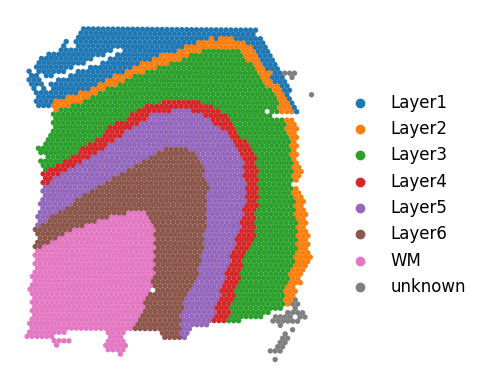

In [46]:
sc.pl.spatial(adata_1, img_key=None, color=['annotation'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [97]:
adata_1.obsm["X_umap"] = adata_1.obs[['UMAP_1', 'UMAP_2']].values
adata_2.obsm["X_umap"] = adata_2.obs[['UMAP_1', 'UMAP_2']].values
adata_combined = adata_1.concatenate(adata_2, batch_key="slice_name", batch_categories=['slice_1','slice_2'])

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


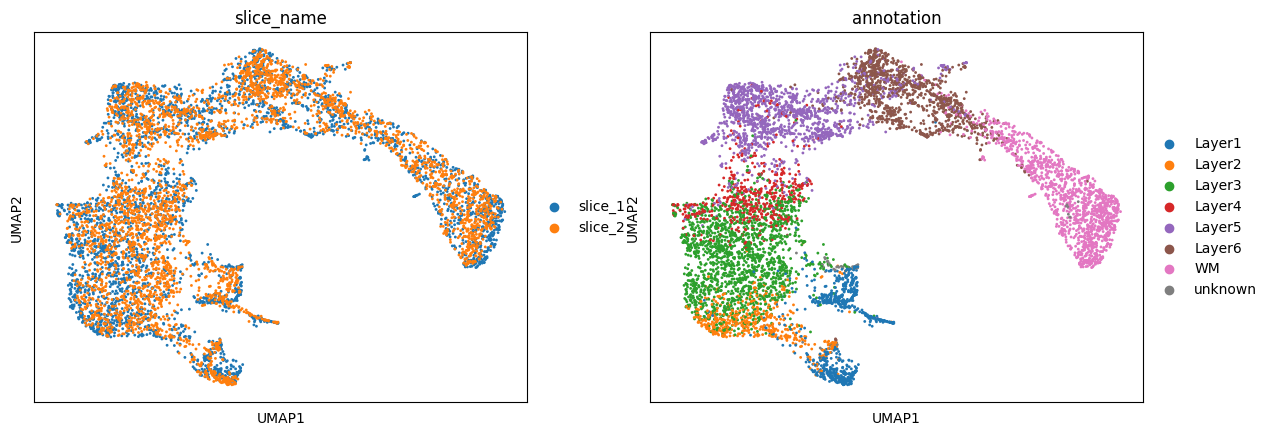

In [98]:
sc.pl.umap(adata_combined, color=['slice_name', 'annotation'])

In [99]:
adata_combined

AnnData object with n_obs × n_vars = 7265 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'annotation', 'banksy', 'UMAP_1', 'UMAP_2', 'slice_name'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'slice_name_colors', 'annotation_colors'
    obsm: 'X_pca', 'spatial', 'X_umap'

In [101]:
lisi_scores = compute_lisi_for_adata(adata_combined, obsm_key='X_pca', obs_key_list=['annotation', 'slice_name'])
print("LISI Scores:\n", lisi_scores)

LISI Scores:
 {'cLISI': 1.4093751584078684, 'iLISI': 1.6877740273650865}


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


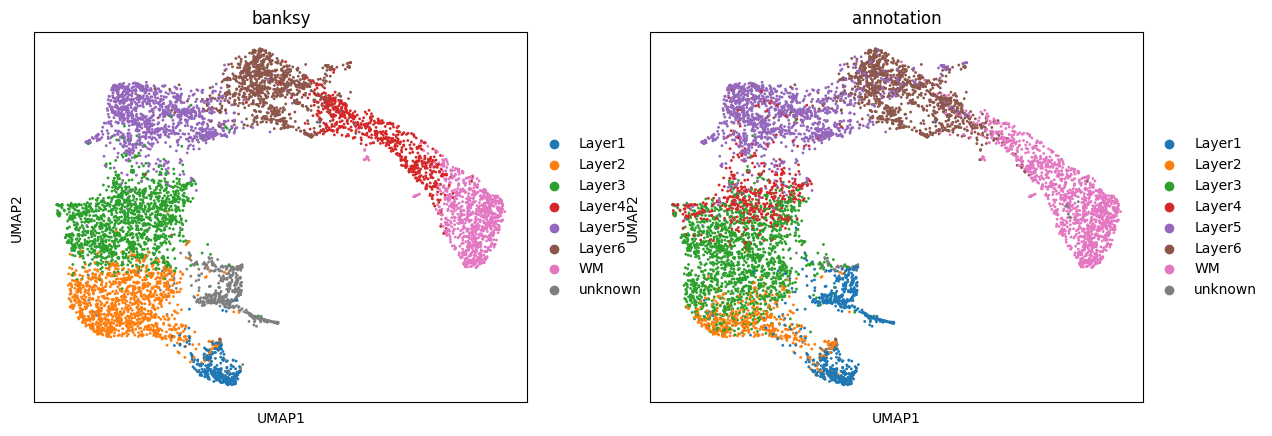

In [55]:
sc.pl.umap(adata_combined, color=['banksy', 'annotation'])

In [50]:
adata_1=sc.read_h5ad(r"D:\ppppaper\data\Result\DFPLC_74.h5ad")
adata_1.var_names_make_unique(join="++")
adata_1

AnnData object with n_obs × n_vars = 3673 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'Spatial_Net', 'spatial'
    obsm: 'm0', 'm1', 'scSLAT_bks', 'spatial'

In [51]:
adata_2=sc.read_h5ad(r"D:\ppppaper\data\Result\DFPLC_75.h5ad")
adata_2.var_names_make_unique(join="++")
adata_2

AnnData object with n_obs × n_vars = 3592 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'annotation', 'transferred_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'Spatial_Net', 'spatial', 'transferred_labels_colors'
    obsm: 'm0', 'm1', 'scSLAT_bks', 'spatial'

In [52]:
adata_com = sc.concat([adata_1,adata_2], label= 'slice_name', keys= ['slice_1','slice_2'])

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [53]:
adata_com

AnnData object with n_obs × n_vars = 7265 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'annotation', 'slice_name'
    obsm: 'm0', 'm1', 'scSLAT_bks', 'spatial'

In [54]:
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_2 = adata_2.obs['annotation'].to_numpy()

best_3, index_3, distance_3 = spatial_match([adata_1.obsm['m0'], adata_2.obsm['m0']], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best_3 < true_labels_1.size
valid_best = best_3[valid_indices]
valid_indices = np.arange(len(best_3))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.6437689116462275, NMI: 0.6851051979683326


In [55]:
adata5_df = pd.DataFrame({'index': range(adata_1.obsm['m0'].shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata6_df = pd.DataFrame({'index': range(adata_2.obsm['m0'].shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['annotation']})

matching_3 = np.array([range(index_3.shape[0]), best_3])
best_match_3 = distance_3[:,0]

In [56]:
first_indices = matching_3[0]
second_indices = matching_3[1]
second_array_labels = adata5_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels_m0'] = new_labels

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

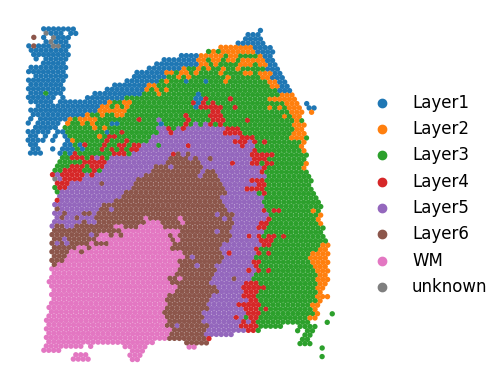

In [57]:
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels_m0'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [58]:
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_2 = adata_2.obs['annotation'].to_numpy()

best_4, index_4, distance_4 = spatial_match([adata_1.obsm['m1'], adata_2.obsm['m1']], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best_4 < true_labels_1.size
valid_best = best_4[valid_indices]
valid_indices = np.arange(len(best_4))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.359318106180783, NMI: 0.38361236744557725


In [59]:
adata7_df = pd.DataFrame({'index': range(adata_1.obsm['m1'].shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata8_df = pd.DataFrame({'index': range(adata_2.obsm['m1'].shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['annotation']})

matching_4 = np.array([range(index_4.shape[0]), best_4])
best_match_4 = distance_4[:,0]

In [60]:
adata8_df['target_celltype'] = adata7_df.iloc[matching_4[1,:],:]['celltype'].to_list()
matching_table_4 = adata8_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

In [61]:
correct_matches = 0
total_matches = 0

for i, row in matching_table_4.iterrows():
    if i in matching_table_4.columns and row[i] > 0:
        correct_matches += row[i]
    total_matches += row.sum()


accuracy = correct_matches / total_matches if total_matches > 0 else 0
correct_matches,total_matches,accuracy

(2127, 3592, 0.5921492204899778)

In [62]:
lisi_scores = compute_lisi_for_adata(adata_com, obsm_key='m1', obs_key_list=['annotation', 'slice_name'])
print("LISI Scores:\n", lisi_scores)

LISI Scores:
 {'cLISI': 2.1107316709010258, 'iLISI': 1.781134371163251}


In [63]:
first_indices = matching_4[0]
second_indices = matching_4[1]
second_array_labels = adata7_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels_m1'] = new_labels

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

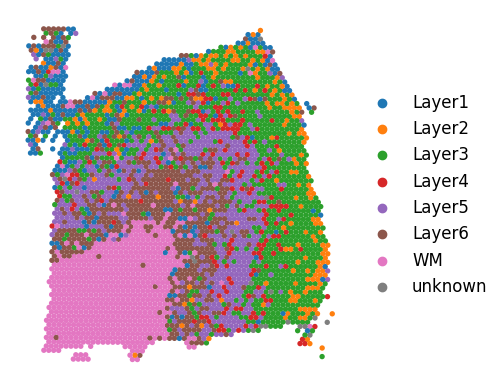

In [64]:
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels_m1'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

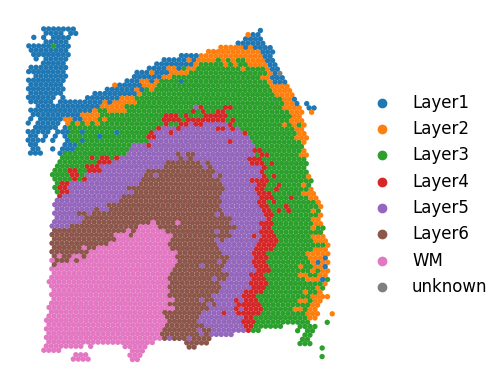

In [65]:
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)